In [84]:
'''
作业要求：
1、数据清洗 - 去除空值
要求：创建函数
提示：fillna方法填充缺失数据，注意inplace参数

2、问题1 知友全国地域分布情况，分析出TOP20
要求：
① 按照地域统计 知友数量、知友密度（知友数量/城市常住人口），不要求创建函数
② 知友数量，知友密度，标准化处理，取值0-100，要求创建函数
③	 通过多系列柱状图，做图表可视化
提示：
① 标准化计算方法 = (X - Xmin) / (Xmax - Xmin)
② 可自行设置图表风格

3、问题2 知友全国地域分布情况，分析出TOP20
要求：
① 按照学校（教育经历字段） 统计粉丝数（‘关注者’）、关注人数（‘关注’），并筛选出粉丝数TOP20的学校，不要求创建函数
② 通过散点图 → 横坐标为关注人数，纵坐标为粉丝数，做图表可视化
③ 散点图中，标记出平均关注人数（x参考线），平均粉丝数（y参考线）


'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as psl
psl.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [9]:
data1 = pd.read_csv('./知乎数据_201701.csv',encoding='gb18030')
data2 = pd.read_csv('./六普常住人口数.csv',encoding='gb18030')

#print(df.columns)
def fill(df):
    for i in df.columns:
        #print(i)
        if df[i].dtype == 'object':

            df[i].fillna('缺失数据',inplace=True)
        else:
            df[i].fillna(0,inplace=True)
    return df

#def normal(df)
    
# step1: 处理缺失值
df1 = fill(data1)
df2 = fill(data2)
#df1.head(12)

# step2：统计全国知友地域分布情况
# 方法一： 直接先利用居住地进行排序抽取top20，然后再进行知友密度进行统计
city = df1['居住地'].value_counts()[:21]
data2['city']=data2['地区'].str[:-1]
dict_city = {'city':city.index,'人数': city.values}
data3 = pd.DataFrame(dict_city)
qldata = pd.merge(data3,data2,on='city')
qldata['知友密度'] = qldata['人数']/qldata['常住人口']



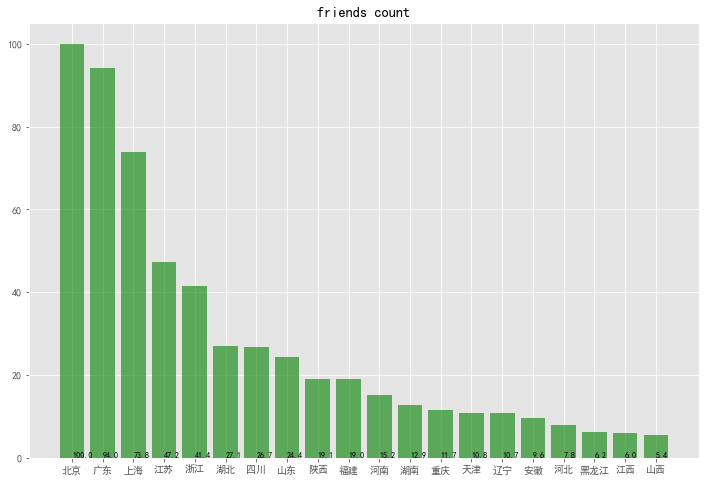

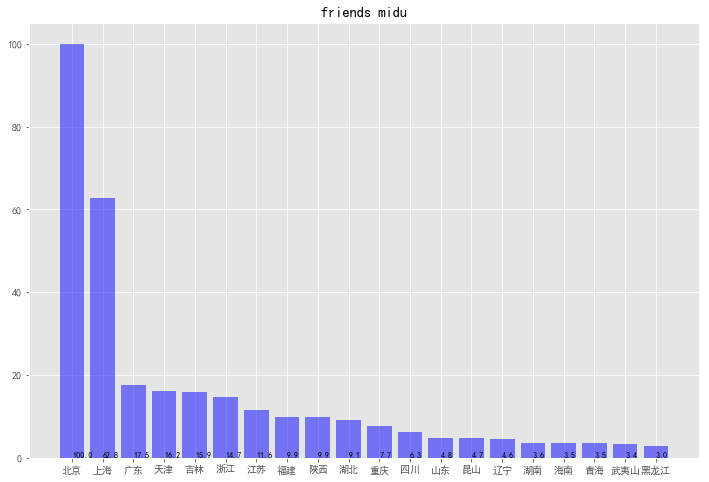

In [85]:

# 方法二：
df_city = data1.groupby('居住地').count()
data2['city']=data2['地区'].str[:-1]
#print(df_city[0:10])
#data2.head()
qg_data = pd.merge(df_city,data2,left_index=True,right_on = 'city')[['_id','city','常住人口']]
qg_data['知友密度'] = qg_data['_id']/qg_data['常住人口']
qg_data.sort_values('_id',ascending=False,inplace=True)
qg_data.head(20)

def normals(df,*kwds):
    colnames=[]
    for col in kwds:
        colname = col + '_nor'
        df[colname] = (df[col] - df[col].min())/(df[col].max()-df[col].min())*100
        colnames.append(colname)
    return (df, colnames)
result_df, colname = normals(qg_data,'_id','知友密度')
#print(colname)
#print(result_df.head(20))
qg_data_top20_sl = result_df.sort_values(colname[0],ascending=False)[['city',colname[0]]][:20]
#print(qg_data_top20_sl.head())
qg_data_top20_md = result_df.sort_values(colname[1],ascending=False)[['city',colname[1]]][:20]
#print(qg_data_top20_md.head())

fig1 = plt.figure(num=1,figsize=(12,8))
y1 = qg_data_top20_sl[colname[0]]
plt.bar(range(20),y1,
        facecolor='g',
        alpha=0.6,
       tick_label = qg_data_top20_sl['city'])
plt.title('friends count')
for i , j in zip(range(20),y1):
    plt.text(i,0,'%.1f'%j,fontsize=8)
    
fig2 = plt.figure(num=2,figsize=(12,8))
y2 = qg_data_top20_md[colname[1]]
plt.bar(range(20),y2,
        facecolor='b',
        alpha=0.5,
       tick_label = qg_data_top20_md['city'])
plt.title('friends midu')
for i , j in zip(range(20),y2):
    plt.text(i,0,'%.1f'%j,fontsize=8)

                 关注     关注者
教育经历                       
武汉大学          51119   53055
华中科技大学        45328   48177
浙江大学          45057  604144
北京大学          43343  197571
东南大学          29361   41814
上海交通大学        28678   45968
吉林大学          28348  159261
复旦大学          28045   37905
中山大学（SYSU）    27085   15018
深圳大学          27064    2566
哈尔滨工业大学（HIT）  26490  103087
四川大学          24640  100392
同济大学          24519   29510
厦门大学          23840   93728
湖南大学          22971   33453
南京大学          20972    8846
清华大学          20546   25875
上海财经大学        19603  138058
大学本科          19473    6194
西安电子科技大学      19184    2598


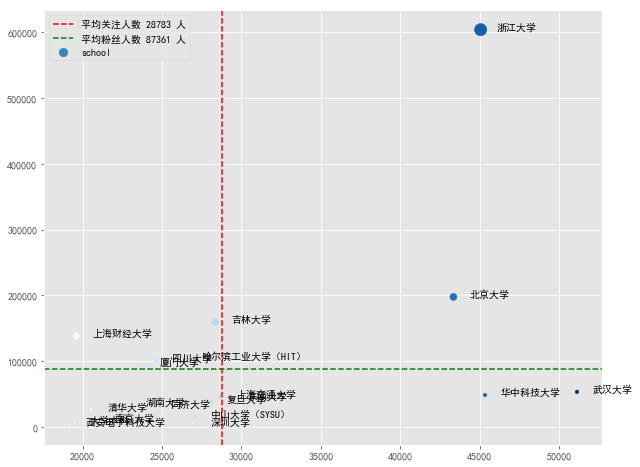

In [86]:
'''3、问题2 知友全国地域分布情况，分析出TOP20
要求：
① 按照学校（教育经历字段） 统计粉丝数（‘关注者’）、关注人数（‘关注’），并筛选出粉丝数TOP20的学校，不要求创建函数
② 通过散点图 → 横坐标为关注人数，纵坐标为粉丝数，做图表可视化
③ 散点图中，标记出平均关注人数（x参考线），平均粉丝数（y参考线）
'''
#q2data = data1.groupby('教育经历').sum()[['关注','关注者']].sort_values('关注', ascending=False)
q2data = data1.groupby('教育经历').sum()[['关注','关注者']].drop(['缺失数据','大学', '本科'])
q2data_c = q2data.sort_values('关注', ascending=False)[:20]
print(q2data_c.head(20))
follow_u = q2data_c['关注'].mean()
fans_u = q2data_c['关注者'].mean()
fig3 = plt.figure(num=3,figsize=(10,8))
plt.scatter(q2data_c['关注'], q2data_c['关注者'],marker='.',
           s = q2data_c['关注者']/1000,
           c = q2data_c['关注'],
           facecolor='blue',
           label='school',
           cmap = 'Blues')
plt.axvline(follow_u,label='平均关注人数 %i 人'% follow_u, color = 'r',linestyle='--')
plt.axhline(fans_u,label='平均粉丝人数 %i 人'% fans_u, color = 'g',linestyle='--')
plt.legend(loc='upper left')
for i ,j ,n in zip(q2data_c['关注'], q2data_c['关注者'], q2data_c.index):
    plt.text(i+1000,j,n)